# Julia 基礎圖表繪製: Gadfly 二維資料圖表

In [6]:
using RDatasets, Gadfly
import Cairo, Fontconfig  # 要儲存成 png 格式需要

## 散佈圖

In [7]:
using DataFrames

In [9]:
iris = dataset("datasets", "iris")
first(iris,5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


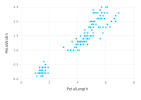

In [10]:
p = plot(iris, x="PetalLength", y="PetalWidth", Geom.point)

In [4]:
draw(PNG("scatter.png", 12cm, 9cm), p)

## 熱圖

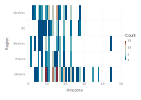

In [11]:
data = dataset("car", "Womenlf")
p = plot(data, x="HIncome", y="Region", Geom.histogram2d)

In [6]:
draw(PNG("heatmap.png", 12cm, 9cm), p)

## 密度的呈現

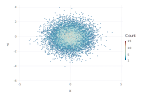

In [12]:
p = plot(x=randn(10000), y=randn(10000), Geom.hexbin)

In [8]:
draw(PNG("density.png", 12cm, 9cm), p)

## 等高線圖

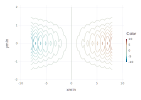

In [13]:
f(x,y) = x*exp(-(x-round(Int, x))^2-y^2)
p = plot(z=f, xmin=[-8], xmax=[8], ymin=[-2], ymax=[2], Geom.contour)

In [10]:
draw(PNG("contour1.png", 12cm, 9cm), p)

In [14]:
volcano = Matrix(dataset("datasets", "volcano"))

87×61 Array{Int64,2}:
 100  100  101  101  101  101  101  100  …  106  106  105  105  104  104  103
 101  101  102  102  102  102  102  101     107  106  106  105  105  104  104
 102  102  103  103  103  103  103  102     107  107  106  106  105  105  104
 103  103  104  104  104  104  104  103     108  107  107  106  106  105  105
 104  104  105  105  105  105  105  104     108  107  107  107  106  106  105
 105  105  105  106  106  106  106  105  …  108  108  108  107  107  106  106
 105  106  106  107  107  107  107  106     109  109  108  108  107  107  106
 106  107  107  108  108  108  108  107     110  109  109  108  108  107  106
 107  108  108  109  109  109  109  108     110  110  109  109  108  107  107
 108  109  109  110  110  110  110  109     111  110  110  109  108  107  107
 109  110  110  111  111  111  111  110  …  112  111  110  109  108  107  106
 110  110  111  113  112  111  113  112     113  111  110  109  108  107  106
 110  111  113  115  114  113  114  114   

In [16]:
coord = Coord.cartesian(xmin=0, xmax=80, ymin=0, ymax=60)
coord

Gadfly.Coord.Cartesian([:x, :xmin, :xmax, :xintercept], [:y, :ymin, :ymax, :yintercept, :middle, :lower_hinge, :upper_hinge, :lower_fence, :upper_fence, :outliers], 0, 80, 0, 60, false, false, false, nothing, false)

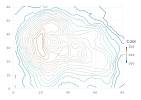

In [17]:
p = plot(coord, z=volcano, Geom.contour)

In [13]:
draw(PNG("contour2.png", 12cm, 9cm), p)

## 向量圖

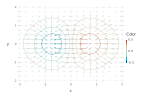

In [20]:
coord = Coord.cartesian(xmin=-2, xmax=2, ymin=-2, ymax=2)
p = plot(coord, z=(x,y)->x*exp(-(x^2+y^2)), x=-2:0.25:2.0, y=-2:0.25:2.0,
Geom.vectorfield(scale=0.4), Geom.contour(levels=6),
Scale.x_continuous(minvalue=-2.0, maxvalue=2.0),
Scale.y_continuous(minvalue=-2.0, maxvalue=2.0))

In [15]:
draw(PNG("vector.png", 12cm, 9cm), p)